## **Data-Driven and AI-First Finance**
#### **Data-Driven Finance**
Vai mostrar como é fácil conseguir dados financeiros hoje em dia. Ele puxa os dados das ações da apple de uma base online mas precisa da assinatura pra ter acesso então não da pra fazer aqui.

**This sub-section requires a license for Eikon. Therefore no code is provided.**

#### **AI-First Finance**
Fala que Python é muito utilizado pelas empresas de AI, podendo ser integrado ao mudo das finanças quando se trata de ML e DL. Da como exemplo um código com foco em ML que será aprofundado mais para frente.

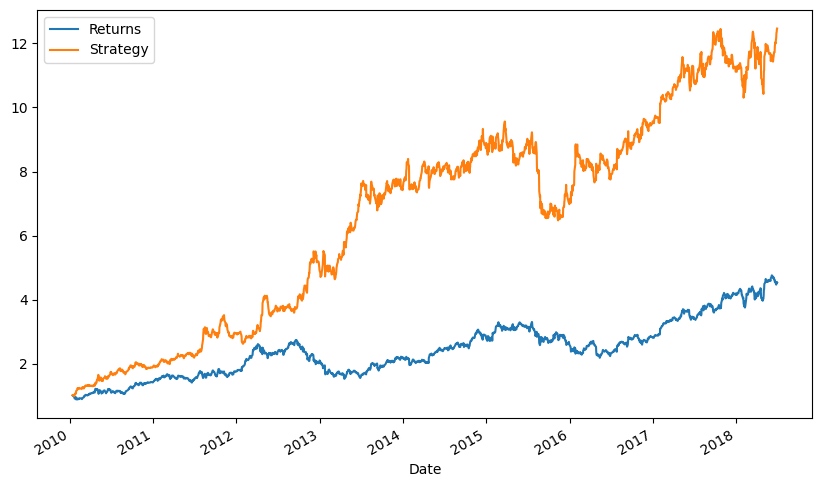

In [6]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC

data = pd.read_csv('C:/Users/otavi/Documents/GitHub/Python_for_finance/source/tr_eikon_eod_data_rounded.csv',
                   index_col = 0, parse_dates = True)
data = pd.DataFrame(data['AAPL.O'])
data['Returns'] = np.log(data / data.shift())
data.dropna(inplace = True)

lags = 6

cols = []

for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))
    cols.append(col)
data.dropna(inplace = True)

model = SVC(gamma = 'auto')

model.fit(data[cols], np.sign(data['Returns']))

data['Prediction'] = model.predict(data[cols])
data['Strategy'] = data['Prediction'] * data['Returns']
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));